<a href="https://colab.research.google.com/github/ChrisLezama/Data-Science-1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En el siguiente Colab, se realiza un análisis de los datos reportados por distintas tiendas pertenecientes al Sr. Juan. El objetivo de este analisis es identificar si es necesario cerrar alguna de las tiendas y explicar el por que, para ello se consideraran las variables de los ingresos totales por cada tienda, cuanto se vende de cada categoría de producto, la calificación promedio de cada tienda, que productos son los que mas y menos se venden en cada tienda y finalmente el promedio de los costos de envío de cada tienda, estas variabels nos permitiran tomar una decision informada par apoder darle una recomendación al Sr. Juan.

### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos totales de la Tienda 1: 1150880400.0
 Ingresos totales de la Tienda 2: 1116343500.0
 Ingresos totales de la Tienda 3: 1098019600.0
 Ingresos totales de la Tienda 4: 1038375700.0



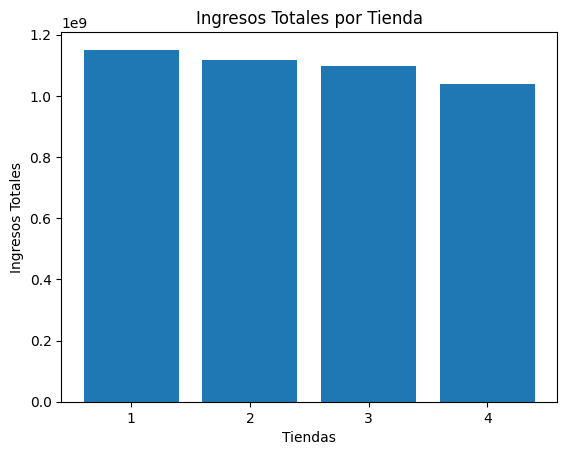

In [43]:
import matplotlib.pyplot as plt

total_tienda1=tienda.iloc[:,2].sum()
total_tienda2=tienda2.iloc[:,2].sum()
total_tienda3=tienda3.iloc[:,2].sum()
total_tienda4=tienda4.iloc[:,2].sum()

ingresos=[total_tienda1,total_tienda2,total_tienda3,total_tienda4]
tiendas=["1","2","3","4"]

print(f"Ingresos totales de la Tienda 1: {total_tienda1}\n Ingresos totales de la Tienda 2: {total_tienda2}\n Ingresos totales de la Tienda 3: {total_tienda3}\n Ingresos totales de la Tienda 4: {total_tienda4}\n")

plt.bar(tiendas, ingresos)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda')
plt.show()

En esta parte es posible apreciar que la tienda que posee una menor cantidad de ingresos es la tienda 4 que si bien es por lo minimo, no percibe del todo lo mismo que las otras tres tiendas.

Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


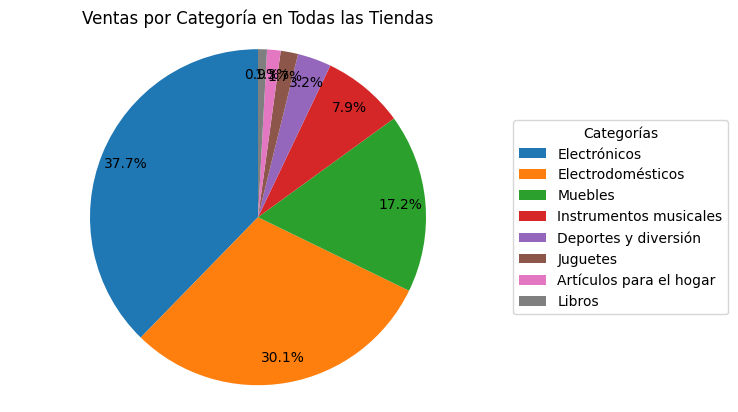

In [11]:
import matplotlib.pyplot as plt

all_tiendas=pd.concat([tienda,tienda2,tienda3,tienda4])

ventas_por_categoria=all_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

print(ventas_por_categoria)


plt.pie(ventas_por_categoria, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Ventas por Categoría en Todas las Tiendas')
plt.legend(ventas_por_categoria.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()


# 2. Ventas por categoría

Cantidad de Productos por Categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Categoría del Producto, dtype: int64



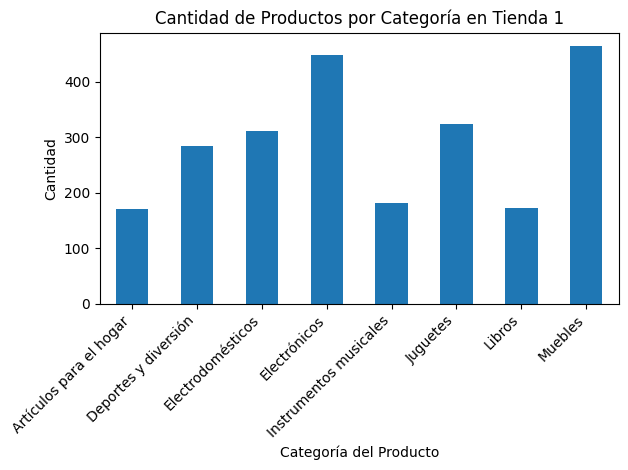

Cantidad de Productos por Categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Categoría del Producto, dtype: int64



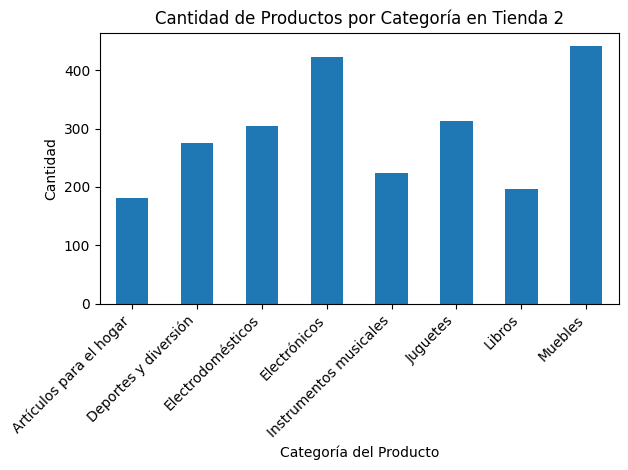

Cantidad de Productos por Categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
Name: Categoría del Producto, dtype: int64



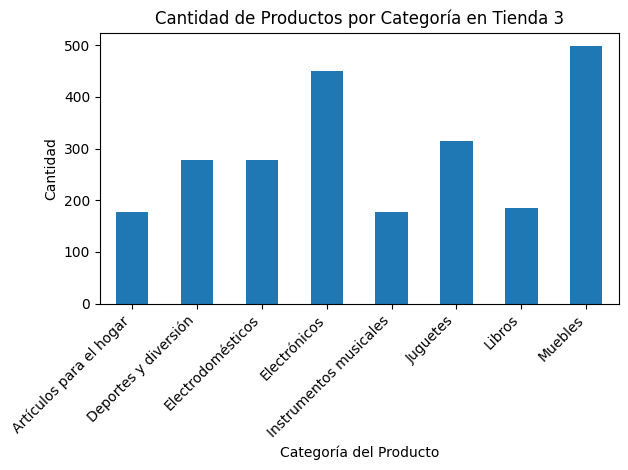

Cantidad de Productos por Categoría en Tienda 4:
Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos          254
Electrónicos               451
Instrumentos musicales     170
Juguetes                   338
Libros                     187
Muebles                    480
Name: Categoría del Producto, dtype: int64



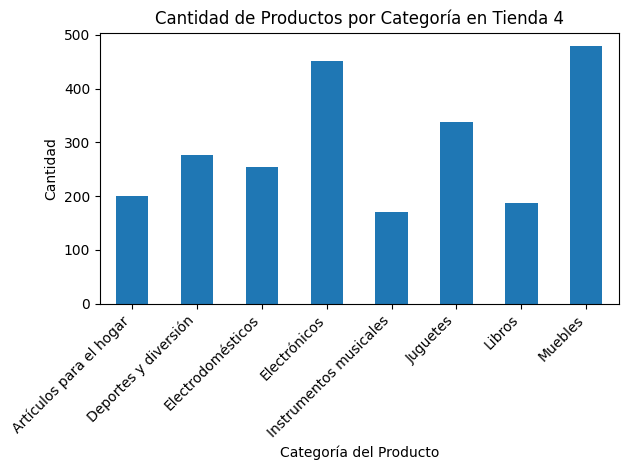

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

tiendas_data = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, df_tienda in tiendas_data.items():
    conteo = df_tienda.groupby('Categoría del Producto')['Categoría del Producto'].count()
    print(f"Cantidad de Productos por Categoría en {nombre_tienda}:\n{conteo}\n")

    conteo.plot(kind='bar')
    plt.title(f'Cantidad de Productos por Categoría en {nombre_tienda}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


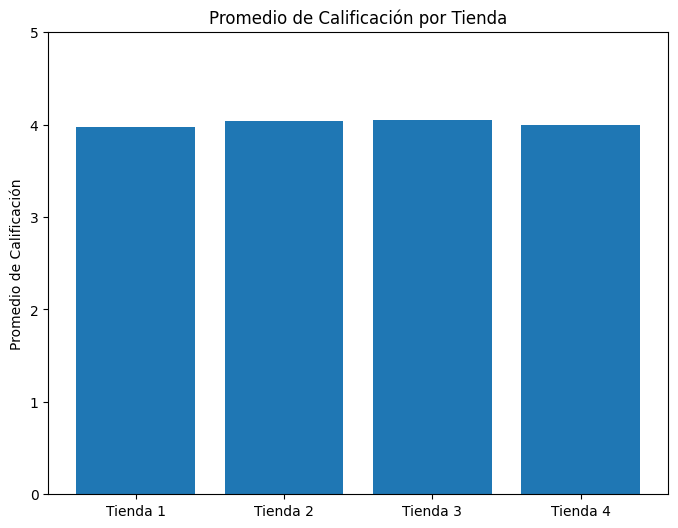

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

tiendas_data = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

nombres_tiendas = []
promedios_calificacion = []

for nombre_tienda, df_tienda in tiendas_data.items():
    promedio_calificacion = df_tienda['Calificación'].mean()
    nombres_tiendas.append(nombre_tienda)
    promedios_calificacion.append(promedio_calificacion)


plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, promedios_calificacion)
plt.ylabel('Promedio de Calificación')
plt.title('Promedio de Calificación por Tienda')
plt.ylim(0, 5)
plt.show()


# 4. Productos más y menos vendidos

In [18]:
# Productos más vendidos por cada tienda
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

tiendas_data = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, df_tienda in tiendas_data.items():
    productos_mas_vendidos = df_tienda.iloc[:, 0].value_counts().head(3)
    print(f"Productos más vendidos en {nombre_tienda}:\n{productos_mas_vendidos}\n")

# Productos menos vendidos por cada tienda

for nombre_tienda, df_tienda in tiendas_data.items():
    productos_menos_vendidos = df_tienda.iloc[:, 0].value_counts().tail(3)
    print(f"Productos menos vendidos en {nombre_tienda}:\n{productos_menos_vendidos}\n")


Productos más vendidos en Tienda 1:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Productos más vendidos en Tienda 4:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64

Productos menos vendidos en Tienda 1:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Productos menos vendidos en Tienda 3:
Producto
Mochila                    36
Microondas   

# 5. Envío promedio por tienda

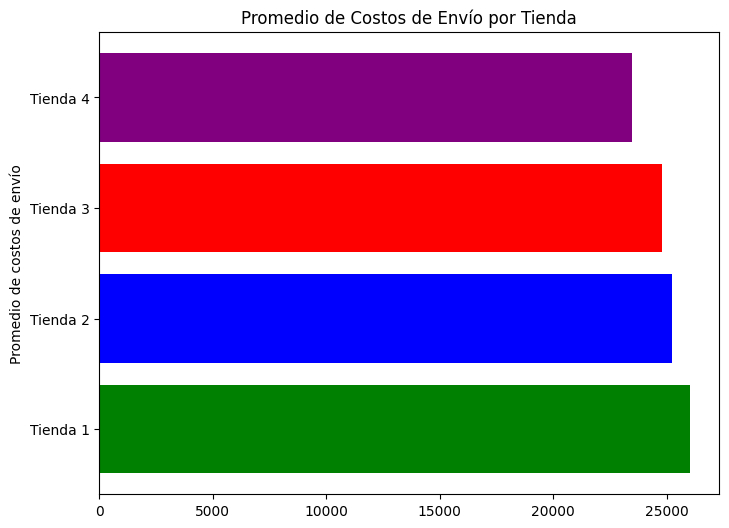

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

tiendas_data = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

nombres_tiendas = []
promedios_envio = []

for nombre_tienda, df_tienda in tiendas_data.items():
    promedio_envio = df_tienda['Costo de envío'].mean()
    nombres_tiendas.append(nombre_tienda)
    promedios_envio.append(promedio_envio)


plt.figure(figsize=(8, 6))
plt.barh(nombres_tiendas, promedios_envio, color=["green","blue","red","purple"])
plt.ylabel('Promedio de costos de envío')
plt.title('Promedio de Costos de Envío por Tienda')
plt.show()

#Conclusión

Tras recabar y analizar minuciosamente los datos referentes a cada una de las variables presentadas, fue posible observar que la tienda que poseee una menor cantidad de ingresos es la Tienda 4, no obstante esta es una de las que posee un menor costo de envío, ahora bien, en terminos de calificaciones las cuatro tiendas poseen una calificación por parte del usuario similar lo que nos indica que su satisfacción es buena.

Con estos simples datos es posible recomendar al Sr. Juan que la Tienda 4 no esta rindiendo de forma adecuada, por lo que se sugiere implementar estrategias de acción dentro de ella para levantar las ventas o en su caso cerrar la tienda, puesto que implicaria en cierto sentido mas perdidias que ganancias a largo plazo, esto por las tendencias que muestra al momento.